# Extended Hodgkin-Huxley Compartmental Model

The Extended Hodgkin-Huxley Compartmental Model builds upon both the classical Hodgkin-Huxley (HH) formalism and cable theory by incorporating a diverse repertoire of voltage-gated ion channels distributed across multiple discrete neuronal compartments. Unlike the basic Hodgkin-Huxley cable model, which typically uses a continuous cable with Na+ and K+ conductances distributed uniformly, the extended compartmental approach models the neuron as a network of connected electrical compartments with heterogeneous channel distributions, allowing for complex spatiotemporal dynamics and neuron type-specific behaviors.

## Key Properties

1. **Compartmentalization**: Discretizes the neuron into multiple connected sections (soma, dendrites, axon) with different properties
2. **Channel Diversity**: Includes multiple types of ion channels beyond the classical Na+ and K+ (e.g., Ca2+, HCN, KA, KCa)
3. **Spatial Channel Distribution**: Non-uniform distribution of channels across compartments
4. **Active Dendrites**: Can model dendritic nonlinearities and local spike generation
5. **Calcium Dynamics**: Tracks intracellular Ca2+ concentration and its effects on channel gating
6. **Morphological Realism**: Can incorporate detailed reconstructed neuronal morphologies
7. **Cell-Type Specificity**: Can reproduce diverse firing patterns of different neuron types

## Mathematical Description

Each compartment is governed by a system of coupled differential equations:

Cm(dVi/dt) = -∑(Iion,i) + ∑(Iaxial) + Iext,i

Where:
- For each ionic current: Iion = g̅ion × activation_variables × (V - Eion)
- For axial currents between compartments: Iaxial = (Vj - Vi)/Raxial

The voltage-gated channel kinetics follow:
dx/dt = (x∞(V) - x)/τx(V)

Where x represents activation/inactivation variables (m, h, n, etc.)

Calcium dynamics are described by:
d[Ca2+]/dt = -f × ICa/(2FVol) - ([Ca2+] - [Ca2+]rest)/τCa

Parameters:
- Vi: Membrane potential of compartment i
- Cm: Specific membrane capacitance (typically 0.5-1.0 μF/cm²)
- g̅ion: Maximum conductance for each ion channel type
- Eion: Reversal potential for each ion channel type
- Raxial: Axial resistance between compartments
- m, h, n, etc.: Activation/inactivation variables for various channels
- α(V), β(V): Voltage-dependent rate constants for channel transitions
- x∞(V): Steady-state value of activation/inactivation variable
- τx(V): Voltage-dependent time constant for channel kinetics
- [Ca2+]: Intracellular calcium concentration
- f: Calcium buffering factor
- F: Faraday constant
- Vol: Volume of compartment
- τCa: Time constant of calcium removal

Channel types typically include:
- Nav: Voltage-gated sodium channels (fast and persistent)
- Kv: Multiple voltage-gated potassium channels (delayed rectifier, A-type, M-type)
- Cav: Multiple voltage-gated calcium channels (L-type, T-type, N-type, P/Q-type, R-type)
- KCa: Calcium-activated potassium channels (SK, BK)
- HCN: Hyperpolarization-activated cyclic nucleotide-gated channels (h-current)
- Leak: Non-specific leak conductance

State Variables:
- Vi: Membrane potential of each compartment
- m, h, n, etc.: Activation/inactivation variables for different channels
- [Ca2+]i: Calcium concentration in each compartment

Time-related variables:
- dt: Time step for numerical integration
- t: Current simulation time
- tmax: Maximum simulation time

## Algorithm

1. Initialize state variables
   - Set all Vi to resting potential
   - Set all activation/inactivation variables to steady-state values
   - Set [Ca2+] to baseline level
   - Create empty lists for recording variables

2. Define compartment structure
   - Create compartment objects with dimensions and locations
   - Define connectivity between compartments
   - Specify channel types and densities for each compartment

3. For each time step from t=0 to t=tmax:
   
   a. For each compartment i:
      - Compute ionic currents based on current voltage and gating variables
      - Compute axial currents between connected compartments
      - Calculate dVi/dt based on membrane equation
   
   b. For each channel type in each compartment:
      - Calculate steady-state values (x∞) and time constants (τx)
      - Update activation/inactivation variables using:
        dx/dt = (x∞(V) - x)/τx(V)
   
   c. For compartments with calcium dynamics:
      - Calculate calcium influx through calcium channels
      - Update calcium concentration using calcium dynamics equation
   
   d. Update all state variables using numerical integration method:
      - For stability, use implicit or semi-implicit methods (e.g., backward Euler or Crank-Nicolson)
      - For accuracy, use higher-order methods (e.g., 4th-order Runge-Kutta)
   
   e. Store variables for recording and analysis
      - Record Vi for selected compartments
      - Record channel states and calcium concentrations as needed
   
   f. Increment time: t = t + dt

4. Analyze and visualize results
   - Plot membrane potential vs time for different compartments
   - Analyze spike timing, frequency, and patterns
   - Examine propagation of signals through the neuron
   - Visualize spatial voltage distribution at key timepoints

## Characteristic Behaviors

1. **Cell-Type Specific Firing**: Different firing patterns (regular, bursting, fast-spiking, delayed, etc.)
2. **Dendritic Spikes**: Local regenerative events in dendrites
3. **Backpropagating Action Potentials**: Somatic spikes that propagate backward into dendrites
4. **Calcium Spikes**: Broader, slower spikes mediated by calcium channels
5. **Spike Frequency Adaptation**: Changes in firing rate during sustained input
6. **Resonance Properties**: Preferential response to inputs at specific frequencies
7. **Non-linear Dendritic Integration**: Supralinear or sublinear summation of synaptic inputs
8. **Bistability**: Multiple stable membrane potential states
9. **Rebound Firing**: Spiking following release from hyperpolarization
10. **Complex Bursting Behaviors**: Patterns of closely spaced spikes separated by periods of silence

## Biological Mechanisms Represented

The extended HH compartmental model represents:
- Detailed structure and morphology of neurons
- Diverse ion channel types with specific distributions
- Calcium signaling cascades
- Dendritic computational properties
- Active propagation of signals through the neuron
- Homeostatic mechanisms maintaining ion concentrations
- Cell-type specific physiological signatures
- Integration of spatially distributed inputs
- Local and global electrogenic properties
- Interactions between different cellular domains (soma, dendrites, axon)

## Applications

The extended HH compartmental model is particularly useful for:
- Detailed modeling of specific neuron types across brain regions
- Understanding how dendritic morphology affects neuronal computation
- Investigating the role of specific ion channels in neuronal behavior
- Exploring the effects of channel mutations in neurological disorders
- Predicting effects of pharmacological agents on neuron dynamics
- Interpreting complex electrophysiological recordings
- Developing reduced models with biologically realistic behavior
- Studying synaptic integration and plasticity in spatially extended neurons
- Examining how subcellular mechanisms contribute to network activity
- Understanding how developmental or pathological changes affect neuronal function

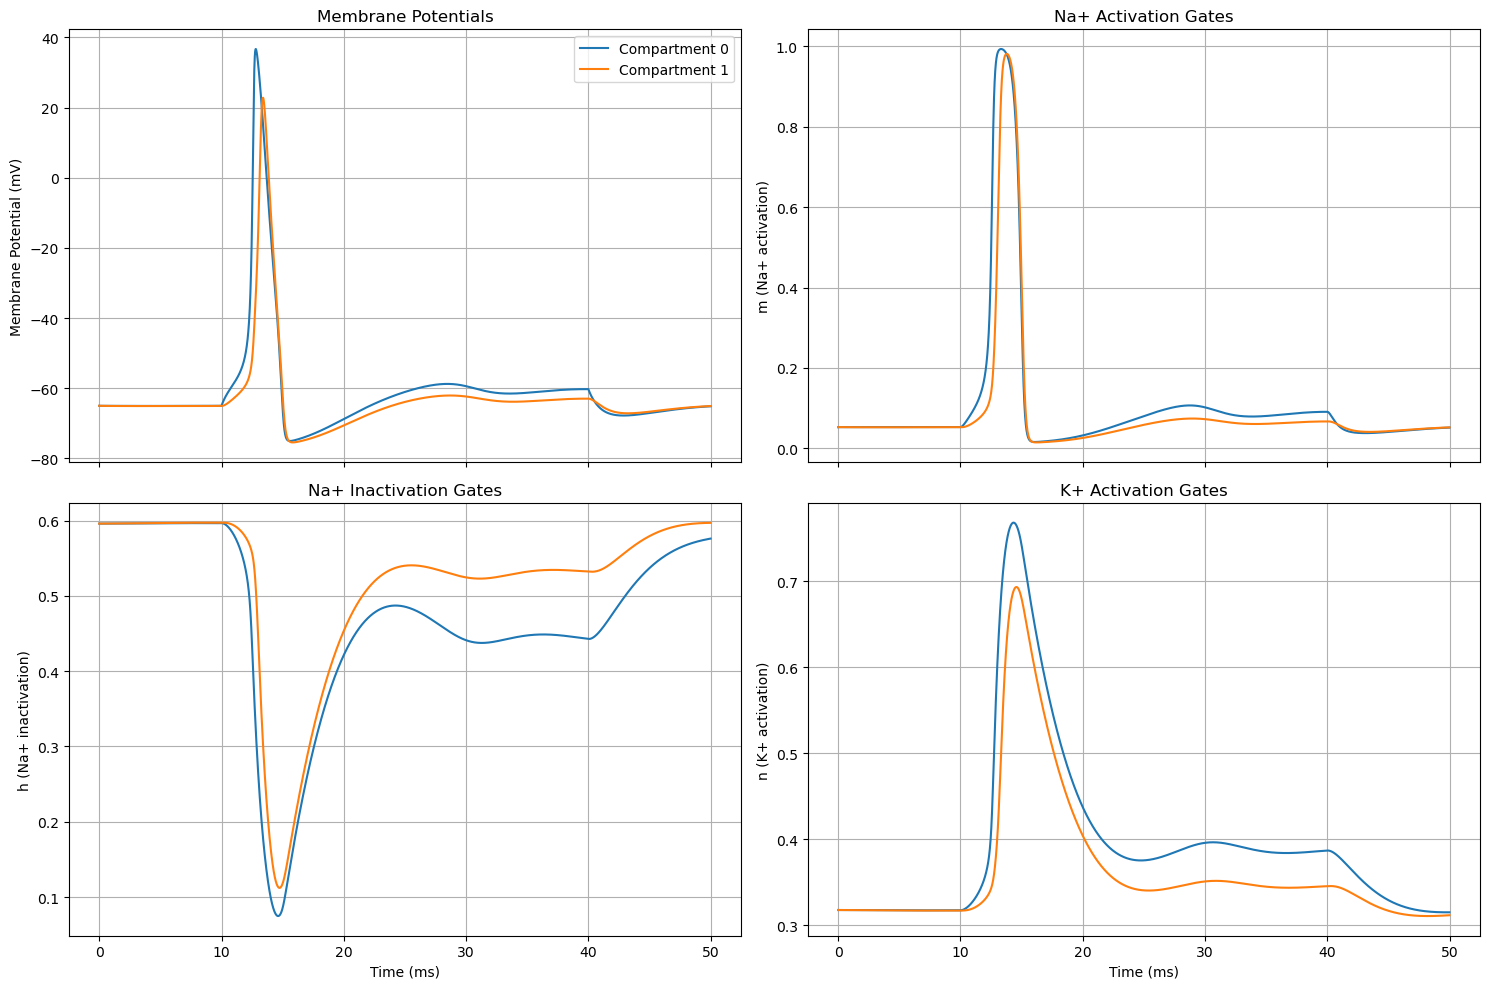

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class ExtendedHHCompartmental():
    def __init__(self, compartments, connections, time_steps, I_inj=None):
        """
        Initialize the Extended Hodgkin-Huxley Compartmental Model
        
        Parameters:
        -----------
        compartments : list of dicts
            Each dict contains parameters for a compartment (area, capacitance, channel densities)
        connections : list of tuples
            Each tuple (i, j, g) defines a connection from compartment i to j with conductance g
        time_steps : array
            Time points for simulation (ms)
        I_inj : dict or None
            Dictionary mapping compartment indices to injected current functions
        """
        self.compartments = compartments
        self.connections = connections
        self.time_steps = time_steps
        self.num_compartments = len(compartments)
        self.I_inj = I_inj if I_inj is not None else {}
        
        # Standard HH parameters (can be overridden in compartment dicts)
        self.default_params = {
            'C_m': 1.0,           # μF/cm²
            'g_Na': 120.0,        # mS/cm²
            'g_K': 36.0,          # mS/cm²
            'g_L': 0.3,           # mS/cm²
            'E_Na': 50.0,         # mV
            'E_K': -77.0,         # mV
            'E_L': -54.387,       # mV
            'area': 1.0,          # cm²
        }
        
        # Initialize compartment parameters with defaults for missing values
        for i, comp in enumerate(self.compartments):
            for param, value in self.default_params.items():
                if param not in comp:
                    self.compartments[i][param] = value
    
    def alpha_m(self, V):
        """Na+ activation gate rate constant"""
        return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))
    
    def beta_m(self, V):
        """Na+ activation gate rate constant"""
        return 4.0 * np.exp(-(V + 65.0) / 18.0)
    
    def alpha_h(self, V):
        """Na+ inactivation gate rate constant"""
        return 0.07 * np.exp(-(V + 65.0) / 20.0)
    
    def beta_h(self, V):
        """Na+ inactivation gate rate constant"""
        return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))
    
    def alpha_n(self, V):
        """K+ activation gate rate constant"""
        return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))
    
    def beta_n(self, V):
        """K+ activation gate rate constant"""
        return 0.125 * np.exp(-(V + 65.0) / 80.0)
    
    def compute_derivatives(self, t, y):
        """Compute derivatives for all state variables"""
        # Extract state variables
        # For each compartment: V, m, h, n
        num_vars_per_comp = 4
        derivatives = np.zeros_like(y)
        
        for i in range(self.num_compartments):
            # Extract state variables for this compartment
            idx = i * num_vars_per_comp
            V = y[idx]
            m = y[idx + 1]
            h = y[idx + 2]
            n = y[idx + 3]
            
            comp = self.compartments[i]
            
            # Calculate ion channel currents
            I_Na = comp['g_Na'] * m**3 * h * (V - comp['E_Na'])
            I_K = comp['g_K'] * n**4 * (V - comp['E_K'])
            I_L = comp['g_L'] * (V - comp['E_L'])
            
            # Calculate inter-compartmental currents
            I_comp = 0
            for src, dst, g in self.connections:
                if dst == i:  # Current flowing into this compartment
                    V_src = y[src * num_vars_per_comp]
                    I_comp += g * (V_src - V)
                elif src == i:  # Current flowing out of this compartment
                    V_dst = y[dst * num_vars_per_comp]
                    I_comp -= g * (V - V_dst)
            
            # Add injected current if present
            I_injected = 0
            if i in self.I_inj:
                I_injected = self.I_inj[i](t)
            
            # Compute dV/dt
            dVdt = (I_injected - I_Na - I_K - I_L + I_comp) / comp['C_m']
            
            # Compute gating variable derivatives
            dmdt = self.alpha_m(V) * (1.0 - m) - self.beta_m(V) * m
            dhdt = self.alpha_h(V) * (1.0 - h) - self.beta_h(V) * h
            dndt = self.alpha_n(V) * (1.0 - n) - self.beta_n(V) * n
            
            # Store derivatives
            derivatives[idx] = dVdt
            derivatives[idx + 1] = dmdt
            derivatives[idx + 2] = dhdt
            derivatives[idx + 3] = dndt
        
        return derivatives
    
    def simulate(self):
        """Run the simulation using scipy's ODE solver"""
        # Set initial conditions
        # For each compartment: V, m, h, n
        y0 = np.zeros(4 * self.num_compartments)
        
        for i, comp in enumerate(self.compartments):
            idx = i * 4
            V_init = comp.get('V_init', -65.0)  # Initial voltage
            
            # Initialize with steady-state values at rest
            y0[idx] = V_init
            
            # Steady state values for gating variables at V_init
            alpha_m_0 = self.alpha_m(V_init)
            beta_m_0 = self.beta_m(V_init)
            y0[idx + 1] = alpha_m_0 / (alpha_m_0 + beta_m_0)
            
            alpha_h_0 = self.alpha_h(V_init)
            beta_h_0 = self.beta_h(V_init)
            y0[idx + 2] = alpha_h_0 / (alpha_h_0 + beta_h_0)
            
            alpha_n_0 = self.alpha_n(V_init)
            beta_n_0 = self.beta_n(V_init)
            y0[idx + 3] = alpha_n_0 / (alpha_n_0 + beta_n_0)
        
        # Integrate the ODE system
        t_span = (self.time_steps[0], self.time_steps[-1])
        sol = solve_ivp(
            self.compute_derivatives, 
            t_span, 
            y0, 
            method='RK45', 
            t_eval=self.time_steps,
            rtol=1e-6, 
            atol=1e-6
        )
        
        # Reshape results for easier analysis
        results = {}
        for i in range(self.num_compartments):
            idx = i * 4
            results[f'V_{i}'] = sol.y[idx]
            results[f'm_{i}'] = sol.y[idx + 1]
            results[f'h_{i}'] = sol.y[idx + 2]
            results[f'n_{i}'] = sol.y[idx + 3]
        
        results['t'] = sol.t
        return results
    
    def plot_results(self, results):
        """Plot the simulation results"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
        
        # Plot membrane potentials
        ax = axes[0, 0]
        for i in range(self.num_compartments):
            ax.plot(results['t'], results[f'V_{i}'], label=f'Compartment {i}')
        ax.set_ylabel('Membrane Potential (mV)')
        ax.set_title('Membrane Potentials')
        ax.grid(True)
        ax.legend()
        
        # Plot Na+ activation (m)
        ax = axes[0, 1]
        for i in range(self.num_compartments):
            ax.plot(results['t'], results[f'm_{i}'], label=f'Compartment {i}')
        ax.set_ylabel('m (Na+ activation)')
        ax.set_title('Na+ Activation Gates')
        ax.grid(True)
        
        # Plot Na+ inactivation (h)
        ax = axes[1, 0]
        for i in range(self.num_compartments):
            ax.plot(results['t'], results[f'h_{i}'], label=f'Compartment {i}')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('h (Na+ inactivation)')
        ax.set_title('Na+ Inactivation Gates')
        ax.grid(True)
        
        # Plot K+ activation (n)
        ax = axes[1, 1]
        for i in range(self.num_compartments):
            ax.plot(results['t'], results[f'n_{i}'], label=f'Compartment {i}')
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('n (K+ activation)')
        ax.set_title('K+ Activation Gates')
        ax.grid(True)
        
        plt.tight_layout()
        plt.show()



# Define a two-compartment model (soma and dendrite)
time_steps = np.arange(0, 50, 0.01)  # 0-50 ms with 0.01 ms steps

# Define compartments (soma and dendrite)
compartments = [
    {  # Soma
        'C_m': 1.0,  # μF/cm²
        'g_Na': 120.0,  # mS/cm²
        'g_K': 36.0,  # mS/cm²
        'g_L': 0.3,  # mS/cm²
        'V_init': -65.0,  # mV
        'area': 1.0,  # cm²
    },
    {  # Dendrite (reduced Na channels)
        'C_m': 1.0,  # μF/cm²
        'g_Na': 40.0,  # mS/cm² (lower than soma)
        'g_K': 30.0,  # mS/cm²
        'g_L': 0.3,  # mS/cm²
        'V_init': -65.0,  # mV
        'area': 0.5,  # cm²
    }
]

# Define connections between compartments
# Format: (source_idx, target_idx, conductance)
connections = [
    (0, 1, 0.5),  # From soma to dendrite
    (1, 0, 0.5)   # From dendrite to soma (bidirectional)
]

# Define current injection (step current to the soma)
def soma_current(t):
    if 10 <= t <= 40:  # Current pulse from 10ms to 40ms
        return 10.0  # μA/cm²
    return 0.0

I_inj = {0: soma_current}  # Inject current into compartment 0 (soma)

# Create the model
hh_model = ExtendedHHCompartmental(
    compartments=compartments,
    connections=connections,
    time_steps=time_steps,
    I_inj=I_inj
)

# Run simulation
results = hh_model.simulate()

# Plot results
hh_model.plot_results(results)